In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('fraudTrain.csv') 
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
df.duplicated().any()

False

In [7]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [9]:
df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')
df['unix_time']
# changed into data time format

0         2012-01-01 00:00:18
1         2012-01-01 00:00:44
2         2012-01-01 00:00:51
3         2012-01-01 00:01:16
4         2012-01-01 00:03:06
                  ...        
1296670   2013-06-21 12:12:08
1296671   2013-06-21 12:12:19
1296672   2013-06-21 12:12:32
1296673   2013-06-21 12:13:36
1296674   2013-06-21 12:13:37
Name: unix_time, Length: 1296675, dtype: datetime64[ns]

In [10]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2012-01-01 00:00:18,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,2012-01-01 00:00:51,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,2012-01-01 00:01:16,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,2012-01-01 00:03:06,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,2013-06-21 12:12:08,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,2013-06-21 12:12:19,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,2013-06-21 12:12:32,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,2013-06-21 12:13:36,42.788940,-103.241160,0


In [11]:
df["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [12]:
df.groupby('is_fraud')['amt'].sum()

is_fraud
0    87234340.29
1     3988088.61
Name: amt, dtype: float64

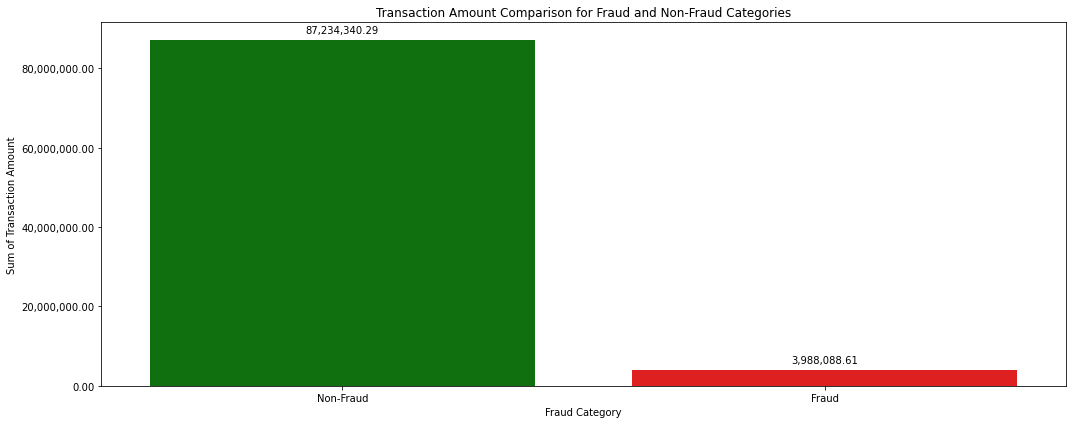

In [13]:
# Group the DataFrame by 'is_fraud' and calculate the sum transaction amount
grouped_df = df.groupby('is_fraud')['amt'].sum().reset_index()

# Plot the transaction amount comparison
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='is_fraud', y='amt', data=grouped_df,palette=['green','red'])

# Format y-axis labels with commas and disable exponential notation
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# Add text labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Fraud Category')
plt.ylabel('Sum of Transaction Amount')
plt.title('Transaction Amount Comparison for Fraud and Non-Fraud Categories')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()



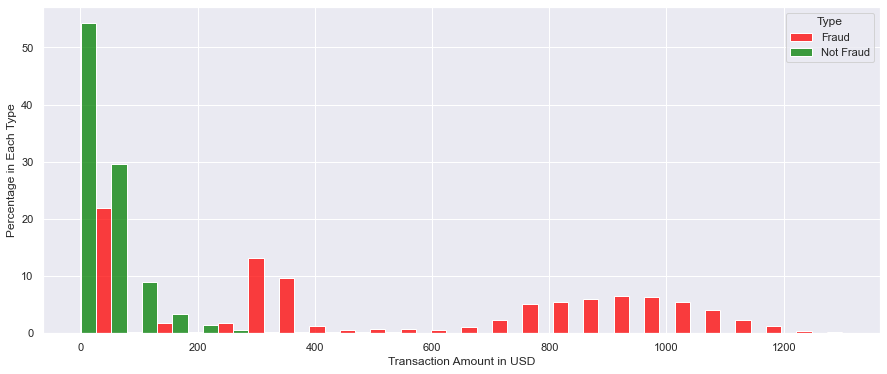

In [14]:
# Set figure size
sns.set(rc={'figure.figsize': (15, 6)})

# Plot the histogram
ax = sns.histplot(x='amt', data=df[df.amt <= 1300], hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, bins=25, palette=['green','red'])

# Set labels and legend
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# Show the plot
plt.show()


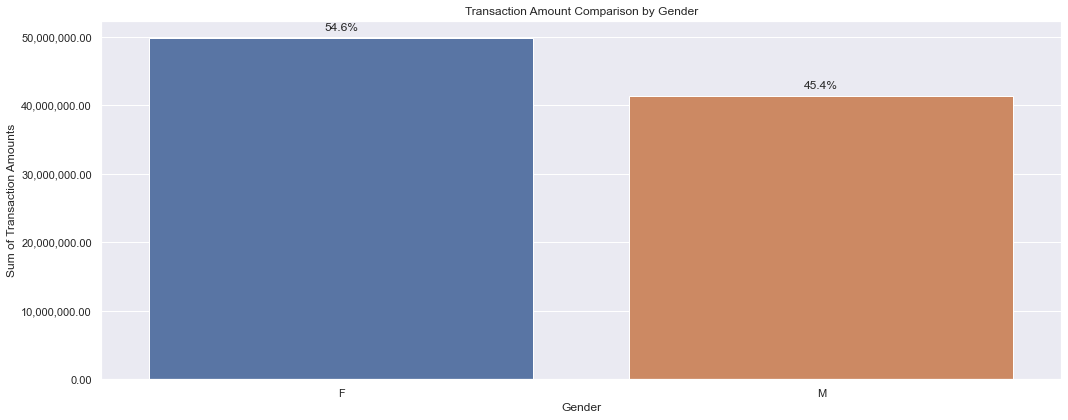

In [15]:
# Group the DataFrame by 'gender' and calculate the sum of transaction amounts
grouped_df = df.groupby('gender')['amt'].sum().reset_index()

# Calculate the percentage of each gender category
grouped_df['percentage'] = grouped_df['amt'] / grouped_df['amt'].sum() * 100

# Plot the transaction amount comparison
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='gender', y='amt', data=grouped_df)

# Format y-axis labels with commas and disable exponential notation
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# Add percentage labels on top of each bar
for p in ax.patches:
    percentage = f'{p.get_height() / grouped_df["amt"].sum() * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Sum of Transaction Amounts')
plt.title('Transaction Amount Comparison by Gender')
plt.tight_layout()
plt.show()


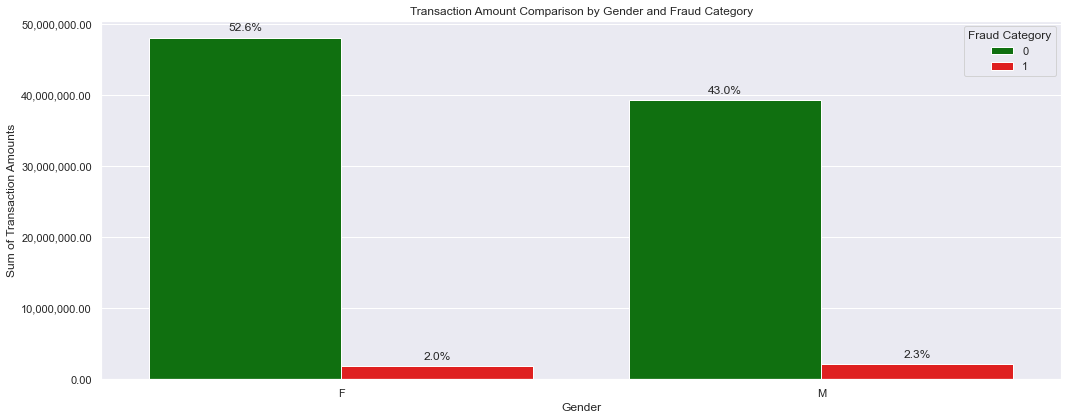

In [16]:
# Group the DataFrame by 'gender' and 'is_fraud', and calculate the sum of transaction amounts
grouped_df = df.groupby(['gender', 'is_fraud'])['amt'].sum().reset_index()

# Calculate the percentage of each gender category
grouped_df['percentage'] = grouped_df['amt'] / grouped_df['amt'].sum() * 100

# Plot the transaction amount comparison
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='gender', y='amt', hue='is_fraud', data=grouped_df, palette=['green','red'])

# Format y-axis labels with commas and disable exponential notation
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# Add percentage labels on top of each bar
for p in ax.patches:
    percentage = f'{p.get_height() / grouped_df["amt"].sum() * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Sum of Transaction Amounts')
plt.title('Transaction Amount Comparison by Gender and Fraud Category')
plt.legend(title='Fraud Category')
plt.tight_layout()
plt.show()


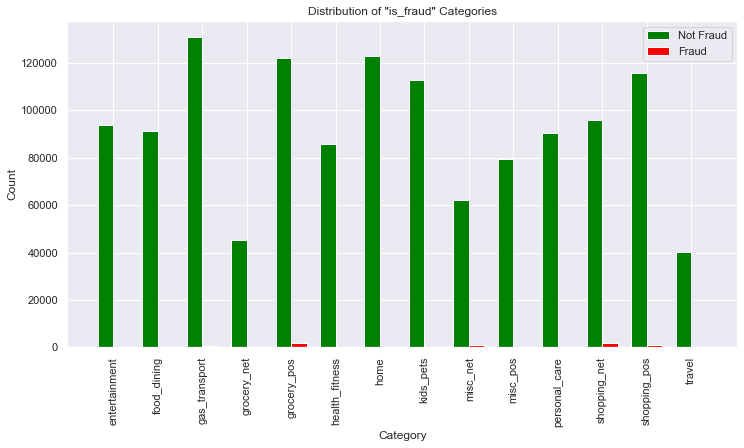

In [17]:
# Group the DataFrame by 'category' and 'is_fraud', and calculate the count of each category
grouped_df = df.groupby(['category', 'is_fraud']).size().reset_index(name='count')

# Pivot the DataFrame to have 'is_fraud' as columns and 'count' as values
pivot_df = grouped_df.pivot(index='category', columns='is_fraud', values='count')

# Get the categories and is_fraud values
categories = pivot_df.index
fraud_values = pivot_df[1]
not_fraud_values = pivot_df[0]

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(categories))

# Define the colors for the bars
colors = ['green','red']

# Create the grouped bar chart with custom colors
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, not_fraud_values, width=bar_width, label='Not Fraud', color=colors[0])
plt.bar(bar_positions + bar_width, fraud_values, width=bar_width, label='Fraud', color=colors[1])

# Set the x-axis tick labels to be the categories
plt.xticks(bar_positions + bar_width/2, categories, rotation=90)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of "is_fraud" Categories')

# Show the legend
plt.legend()

# Show the plot
plt.show()


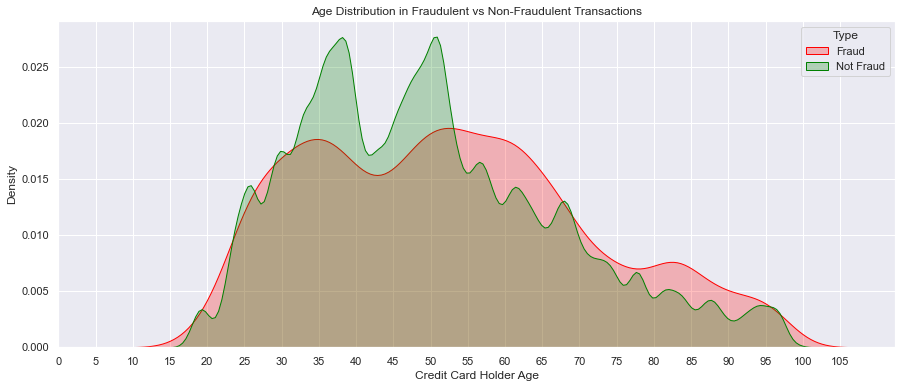

In [18]:

df['age'] = dt.date.today().year - pd.to_datetime(df['dob']).dt.year

# Define the color palette
colors = ['green','red']

# Plot the KDE plot
ax = sns.kdeplot(x='age', data=df, hue='is_fraud', common_norm=False, fill=True, palette=colors)

ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()


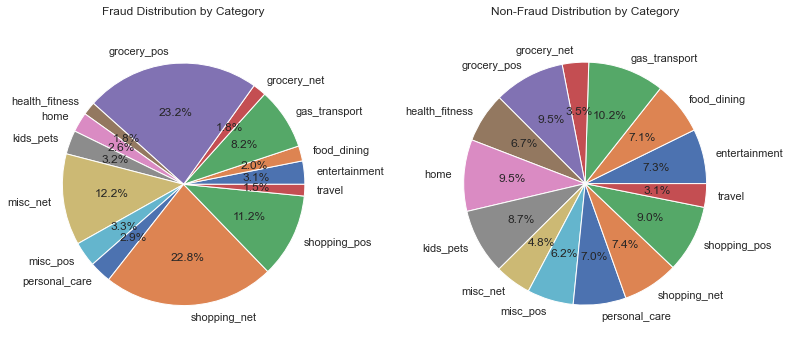

In [19]:
# Group the DataFrame by 'category' and 'is_fraud', and calculate the count of each category
grouped_df = df.groupby(['category', 'is_fraud']).size().reset_index(name='count')

# Pivot the DataFrame to have 'is_fraud' as columns and 'count' as values
pivot_df = grouped_df.pivot(index='category', columns='is_fraud', values='count')

# Calculate the total count of each category
pivot_df['total'] = pivot_df.sum(axis=1)

# Create two subplots for side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for 'is_fraud' categories
ax1.pie(pivot_df[1], labels=pivot_df.index, autopct='%1.1f%%')
ax1.set_title('Fraud Distribution by Category')

# Plot the pie chart for non-fraudulent categories
ax2.pie(pivot_df[0], labels=pivot_df.index, autopct='%1.1f%%')
ax2.set_title('Non-Fraud Distribution by Category')

# Set the aspect ratio to 'equal' for circular pie charts
ax1.axis('equal')
ax2.axis('equal')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the pie charts
plt.show()


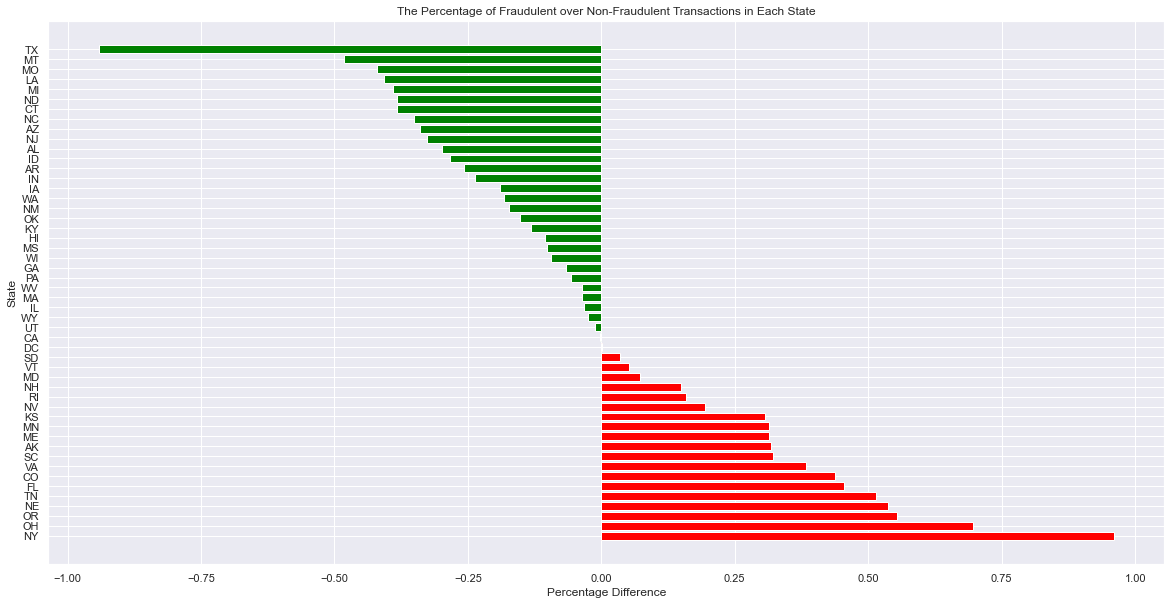

In [20]:
a=df['state'][df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df['state'][df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

# Sort the DataFrame by the 'diff' column in descending order
merged_sorted = merged.sort_values('diff', ascending=False)

# Create a horizontal grouped bar chart
plt.figure(figsize=(20, 10))
plt.barh(merged_sorted['State'], merged_sorted['diff'], color=['red' if d > 0 else 'green' for d in merged_sorted['diff']])

# Set labels and title
plt.xlabel('Percentage Difference')
plt.ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transactions in Each State')

# Show the plot
plt.show()


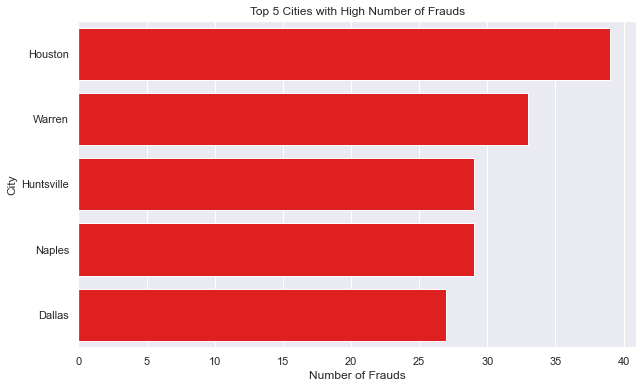

In [21]:
# Get the top 5 cities with high fraud counts across all states
top_cities = df[df['is_fraud'] == 1]['city'].value_counts().head(5)

# Create a bar plot for the top 5 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, color='red')

# Set labels and title
plt.xlabel('Number of Frauds')
plt.ylabel('City')
plt.title('Top 5 Cities with High Number of Frauds')

# Show the plot
plt.show()


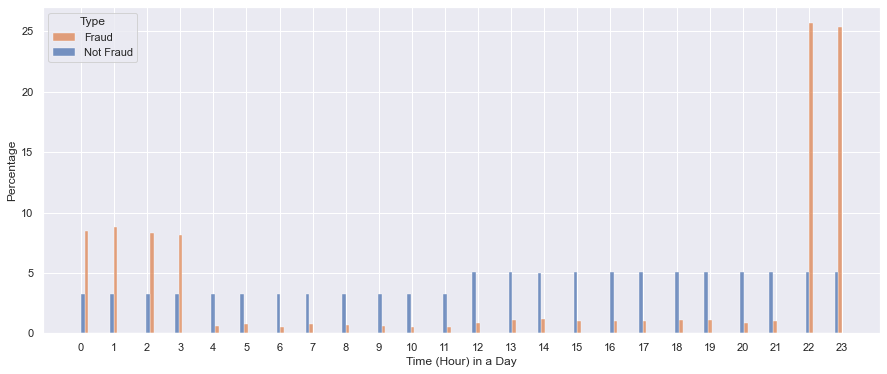

In [22]:
#time in a day vs fraud
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2060\3206469556.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


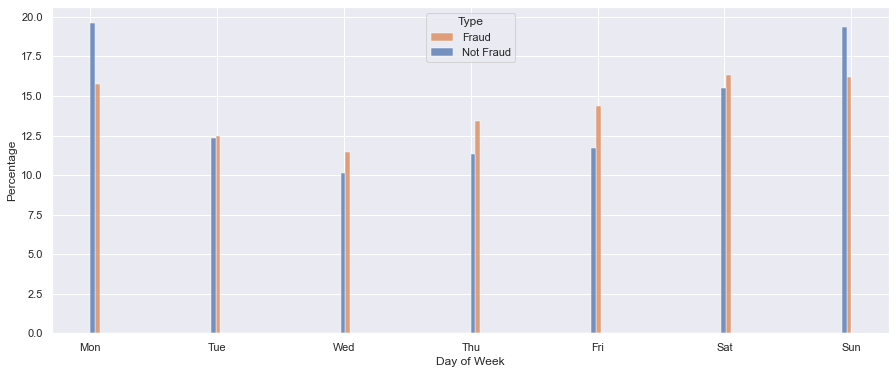

In [23]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

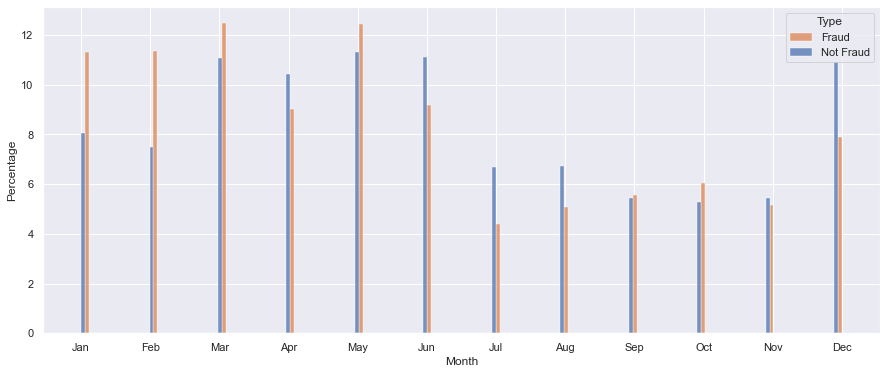

In [24]:
#month vs fraud
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [25]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2012-01-01 00:00:18,36.011293,-82.048315,0,35,0,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,45,0,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,2012-01-01 00:00:51,43.150704,-112.154481,0,61,0,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,2012-01-01 00:01:16,47.034331,-112.561071,0,56,0,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,2012-01-01 00:03:06,38.674999,-78.632459,0,37,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,2013-06-21 12:12:08,36.841266,-111.690765,0,62,12,6,6
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,2013-06-21 12:12:19,38.906881,-78.246528,0,44,12,6,6
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,2013-06-21 12:12:32,33.619513,-105.130529,0,56,12,6,6
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,2013-06-21 12:13:36,42.788940,-103.241160,0,43,12,6,6


In [26]:
#feature selection for training
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
train

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud
0,misc_net,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,1,0
1,grocery_pos,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,1,0
2,entertainment,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,1,0
3,gas_transport,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,1,0
4,misc_pos,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,84735,37.7175,-112.4777,258,36.841266,-111.690765,62,12,6,6,0
1296671,food_dining,51.70,21790,39.2667,-77.5101,100,38.906881,-78.246528,44,12,6,6,0
1296672,food_dining,105.93,88325,32.9396,-105.8189,899,33.619513,-105.130529,56,12,6,6,0
1296673,food_dining,74.90,57756,43.3526,-102.5411,1126,42.788940,-103.241160,43,12,6,6,0


In [27]:
train.dtypes

category       object
amt           float64
zip             int64
lat           float64
long          float64
city_pop        int64
merch_lat     float64
merch_long    float64
age             int64
hour            int64
day             int64
month           int64
is_fraud        int64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit the label encoder to the "category" column
train['category_encoded'] = label_encoder.fit_transform(train['category'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2060\899014153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['category_encoded'] = label_encoder.fit_transform(train['category'])


In [29]:
# Drop the "category" column from the DataFrame
train = train.drop('category', axis=1)
train


,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,category_encoded
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,1,0,8
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,1,0,4
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,1,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,1,0,2
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,36.841266,-111.690765,62,12,6,6,0,0
1296671,51.70,21790,39.2667,-77.5101,100,38.906881,-78.246528,44,12,6,6,0,1
1296672,105.93,88325,32.9396,-105.8189,899,33.619513,-105.130529,56,12,6,6,0,1
1296673,74.90,57756,43.3526,-102.5411,1126,42.788940,-103.241160,43,12,6,6,0,1


In [30]:
train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [31]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = train[train['is_fraud'] == 0]
minority_class = train[train['is_fraud'] == 1]

# Downsample the majority class
downsampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=0)

# Combine the downsampled majority class with the original minority class
downsampled_data = pd.concat([downsampled_majority, minority_class])

# Shuffle the downsampled data
downsampled_data = downsampled_data.sample(frac=1, random_state=0)

# Check the class distribution after downsampling
print(downsampled_data['is_fraud'].value_counts())

# Separate the features (X) and target variable (y)
X= downsampled_data.drop('is_fraud', axis=1)
y = downsampled_data['is_fraud']

0    7506
1    7506
Name: is_fraud, dtype: int64


In [32]:
X_resampled=X
y_resampled=y

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [34]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=0)

In [35]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the training score
y_train_pred = rf.predict(X_resampled)
training_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [36]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the training data
confusion = confusion_matrix(y_resampled, y_train_pred)
print("Confusion Matrix (Training Data):")
confusion

Confusion Matrix (Training Data):


array([[7506,    0],
       [   0, 7506]], dtype=int64)

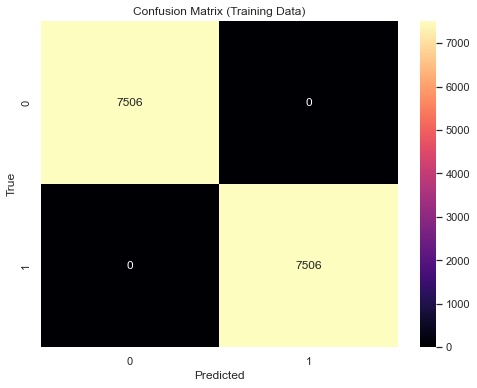

In [37]:
# Calculate the confusion matrix for the training data
confusion = confusion_matrix(y_resampled, y_train_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
# Calculate evaluation metrics for the training data
report = classification_report(y_resampled, y_train_pred)
print("Training Metrics:")
print(report)

Training Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7506
           1       1.00      1.00      1.00      7506

    accuracy                           1.00     15012
   macro avg       1.00      1.00      1.00     15012
weighted avg       1.00      1.00      1.00     15012



### Testing

In [39]:
# Load your testing dataset
test = pd.read_csv('fraudTest.csv')
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [40]:
test.drop('Unnamed: 0', axis=1,inplace=True)

In [41]:
test['unix_time'] = pd.to_datetime(test['unix_time'], unit='s')
test['unix_time']

0        2013-06-21 12:14:25
1        2013-06-21 12:14:33
2        2013-06-21 12:14:53
3        2013-06-21 12:15:15
4        2013-06-21 12:15:17
                 ...        
555714   2013-12-31 23:59:07
555715   2013-12-31 23:59:09
555716   2013-12-31 23:59:15
555717   2013-12-31 23:59:24
555718   2013-12-31 23:59:34
Name: unix_time, Length: 555719, dtype: datetime64[ns]

In [42]:
test.duplicated().any()

False

In [43]:
test.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [44]:
test["is_fraud"].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [45]:
test['age'] = dt.date.today().year - pd.to_datetime(test['dob']).dt.year

In [46]:
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month


In [47]:
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]

In [48]:
test.dtypes

category       object
amt           float64
zip             int64
lat           float64
long          float64
city_pop        int64
merch_lat     float64
merch_long    float64
age             int64
hour            int64
day             int64
month           int64
is_fraud        int64
dtype: object

In [49]:
test['category_encoded'] = label_encoder.fit_transform(test['category'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2060\2856758971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['category_encoded'] = label_encoder.fit_transform(test['category'])


In [50]:
test = test.drop('category', axis=1)
test

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,category_encoded
0,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,55,12,6,6,0,10
1,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,33,12,6,6,0,10
2,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,53,12,6,6,0,5
3,60.05,32780,28.5697,-80.8191,54767,28.812398,-80.883061,36,12,6,6,0,9
4,3.19,49632,44.2529,-85.0170,1126,44.959148,-85.884734,68,12,6,6,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,63453,40.4931,-91.8912,519,39.946837,-91.333331,57,23,3,12,0,5
555715,111.84,77566,29.0393,-95.4401,28739,29.661049,-96.186633,24,23,3,12,0,7
555716,86.88,99323,46.1966,-118.9017,3684,46.658340,-119.715054,42,23,3,12,0,7
555717,7.99,83643,44.6255,-116.4493,129,44.470525,-117.080888,58,23,3,12,0,13


In [51]:
test.is_fraud.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [52]:

# Separate the majority and minority classes
majority_class_test = test[test['is_fraud'] == 0]
minority_class_test = test[test['is_fraud'] == 1]

# Downsample the majority class
downsampled_majority_test = resample(majority_class_test, replace=False, n_samples=len(minority_class_test), random_state=0)

# Combine the downsampled majority class with the original minority class
downsampled_data_test = pd.concat([downsampled_majority_test, minority_class_test])

# Shuffle the downsampled data
downsampled_data_test = downsampled_data_test.sample(frac=1, random_state=0)

# Check the class distribution after downsampling
print(downsampled_data_test['is_fraud'].value_counts())




0    2145
1    2145
Name: is_fraud, dtype: int64


In [53]:
# Separate features and target variable in the testing data
X_test = downsampled_data_test.drop('is_fraud', axis=1)
y_test = downsampled_data_test['is_fraud']

In [54]:
X_test_resampled=X_test
y_test_resampled=y_test

In [55]:
# Make predictions on the testing data
y_test_pred = rf.predict(X_test_resampled)
y_test_pred


array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [56]:
# Calculate the accuracy of the testing score
testing_accuracy = accuracy_score(y_test_resampled, y_test_pred)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.9662004662004662


In [58]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the testing data
confusion = confusion_matrix(y_test_resampled, y_test_pred)
print("Confusion Matrix (Testing Data):")
confusion

Confusion Matrix (Testing Data):


array([[2104,   41],
       [ 104, 2041]], dtype=int64)

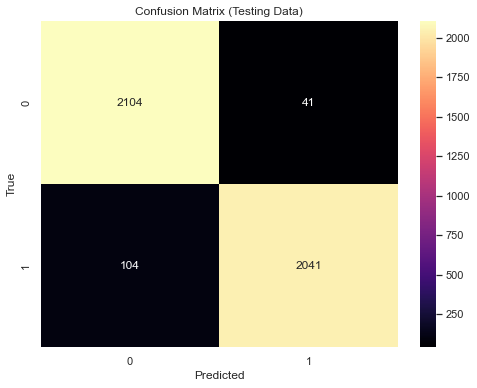

In [59]:
# Calculate the confusion matrix for the testing data
confusion = confusion_matrix(y_test_resampled, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
# Evaluate the model's performance
report_test= classification_report(y_test_resampled, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2145
           1       0.98      0.95      0.97      2145

    accuracy                           0.97      4290
   macro avg       0.97      0.97      0.97      4290
weighted avg       0.97      0.97      0.97      4290



In [64]:

# Assuming you have the actual and predicted values as separate Series or lists
actual_values = downsampled_data_test['is_fraud']
predicted_values = y_test_pred
# Create a DataFrame to combine actual and predicted values
comparison_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})

# Display the DataFrame
comparison_df


,Actual,Predicted
493754,0,0
93751,1,1
442492,0,0
429206,1,1
517517,0,0
254860,0,0
425537,0,0
84546,0,0
21444,0,0
397066,1,1


In [67]:
actual_fraud=comparison_df[comparison_df['Actual'] == 1]
actual_fraud

,Actual,Predicted
93751,1,1
429206,1,1
397066,1,1
151230,1,1
301363,1,1
...,...,...
116112,1,1
288763,1,1
258455,1,1
118300,1,1


In [68]:
actual_notfraud=comparison_df[comparison_df['Actual'] == 0]
actual_notfraud

,Actual,Predicted
493754,0,0
442492,0,0
517517,0,0
254860,0,0
425537,0,0
...,...,...
356079,0,0
463092,0,0
123774,0,0
534423,0,0


In [74]:
predicted_fraud=comparison_df[comparison_df['Predicted'] == 1]
predicted_fraud

,Actual,Predicted
93751,1,1
429206,1,1
397066,1,1
151230,1,1
301363,1,1
...,...,...
116112,1,1
288763,1,1
258455,1,1
118300,1,1


In [70]:
predicted_notfraud=comparison_df[comparison_df['Predicted'] == 0]
predicted_notfraud

,Actual,Predicted
493754,0,0
442492,0,0
517517,0,0
254860,0,0
425537,0,0
...,...,...
356079,0,0
463092,0,0
123774,0,0
534423,0,0


In [66]:
#pd.reset_option('display.max_rows', None)